# Comparison of generalization capabilities of various optimization techniques in the context of deep networks

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tqdm.notebook as tqdm
import os
from scipy.fft import fft, ifft
# Allow autoreload
%load_ext autoreload
%autoreload 2

## Reproducibility

In [2]:
seed = 2022
random.seed(seed)
np.random.seed(seed)

## Weights Saving/Loading

In [13]:
def save_weights_for_viz(cnn_weights,linear_weights,basename):
    cnn_file = open(basename+"cnn_weights.npy","wb")
    linear_file = open(basename+"linear_weights.npy","wb")
    np.save(cnn_file,cnn_weights)
    np.save(linear_file,linear_weights)
    cnn_file.close()
    linear_file.close()

def load_weights_for_viz(basename):
    cnn_file = open(basename+"cnn_weights.npy","rb")
    linear_file = open(basename+"linear_weights.npy","rb")
    cnn_weights = np.load(cnn_file)
    linear_weights = np.load(linear_file)
    cnn_file.close()
    linear_file.close()
    return cnn_weights,linear_weights

## Weights Visualization

In [14]:
def reduce_weights_dim(weights):
    ### PCA dimension reduction
    pca = PCA(n_components=50,svd_solver="auto")
    weights_pca = pca.fit(weights)
    proj_weights = weights_pca.transform(weights)
    ### T-SNE dimension reduction
    weights_embedded_2d = TSNE(n_components=2, learning_rate='auto',
                   init='pca').fit_transform(proj_weights)
    weights_embedded_3d = TSNE(n_components=3, learning_rate='auto',
                   init='pca').fit_transform(proj_weights)
    return weights_embedded_2d, weights_embedded_3d

def plot_embedded_2d(weights_embedded,size,show=False):
    fig, ax = plt.subplots(figsize=(16,9))
    ax.set_title("Evolution of weights in embedded space (from red to blue).",fontsize=15)
    ax.set_xlabel("Latent dimension 1")
    ax.set_ylabel("Latent dimension 2")
    cm = plt.cm.get_cmap('RdYlBu')
    color_range = range(size)
    sc = ax.scatter(weights_embedded[:,0],weights_embedded[:,1], 
                    c=color_range, vmin=0, vmax=size, s=35, cmap=cm)
    plt.colorbar(sc)
    if show:
        plt.show()
    return fig

def plot_embedded_3d(weights_embedded,size,show=False):
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.set_title("Evolution of weights in embedded space (from red to blue).",fontsize=15)
    cm = plt.cm.get_cmap('RdYlBu')
    color_range = range(size)
    sc = ax.scatter(weights_embedded[:,0],weights_embedded[:,1],weights_embedded[:,2], 
                    c=color_range, vmin=0, vmax=size, s=35, cmap=cm)
    plt.colorbar(sc)
    if show:
        plt.show()
    return fig

def fourier_features(weights,high_freq_tr=10,show=False):
    weights_fft = np.abs(fft(weights,axis=0)).sum(axis=-1)
    fig,ax = plt.subplots(figsize=(16,9))
    ax.set_xlabel("Frequency Range")
    ax.set_ylabel("Log of aggregated frequency amplitude")
    ax.set_title("Frequency content of the weights vector",fontsize=15)
    ax.plot(np.arange(weights_fft.shape[0]//2),np.log(weights_fft)[:weights_fft.shape[0]//2])
    if show:
        plt.show()
    high_freq_ratio = np.sum(weights_fft[high_freq_tr:])/np.sum(weights_fft)
    return high_freq_ratio, fig

def weights_report(weights_folder_path,output_folder="weights_report",show=False,save=False):
    ### Load weights
    cnn_weights,linear_weights = load_weights_for_viz(weights_folder_path)
    time_serie_size = cnn_weights.shape[0]
    ### Output Dict
    output_dict = dict()
    ### Plot embedded weights subspace
    for weights in [cnn_weights,linear_weights]:
        embedded_2d, embedded_3d = reduce_weights_dim(weights)
        fig_2d = plot_embedded_2d(embedded_2d,time_serie_size,show)
        fig_3d = plot_embedded_3d(embedded_3d,time_serie_size,show)
        high_freq_ratio, fig_fourier = fourier_features(weights,show)
        base_fig_name = ""
        if "first_cnn" not in output_dict.keys():
            base_fig_name = "first_cnn"
            output_dict["first_cnn"] = [high_freq_ratio,fig_2d,fig_3d,fig_fourier]
        else:
            base_fig_name = "linear"
            output_dict["linear"] = [high_freq_ratio,fig_2d,fig_3d,fig_fourier]
        if save:
            fig_2d.savefig(output_folder+"/"+base_fig_name+"_fig_2d.png")
            fig_3d.savefig(output_folder+"/"+base_fig_name+"_fig_3d.png")
            fig_fourier.savefig(output_folder+"/"+base_fig_name+"_fig_fourier.png")
    return output_dict

### CIFAR100

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


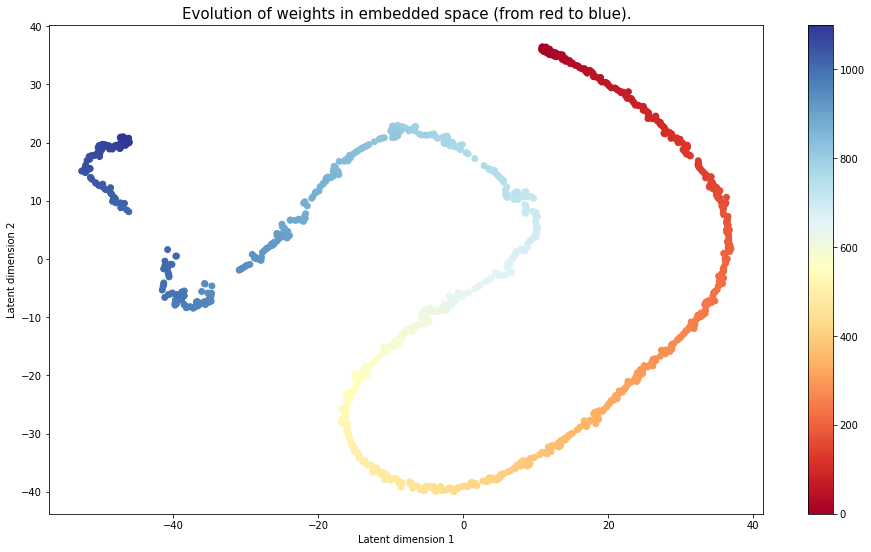

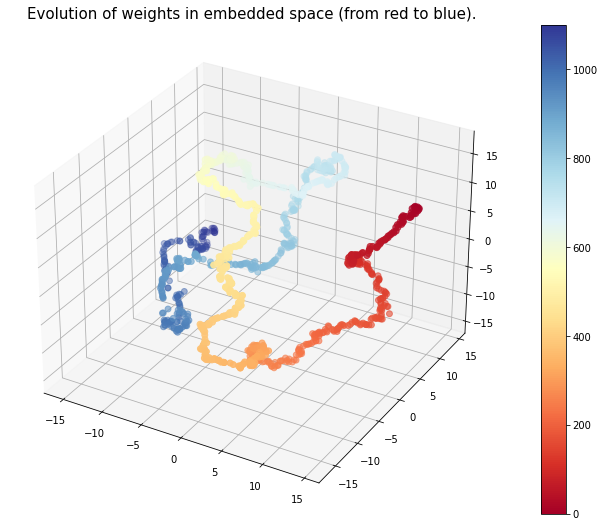

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


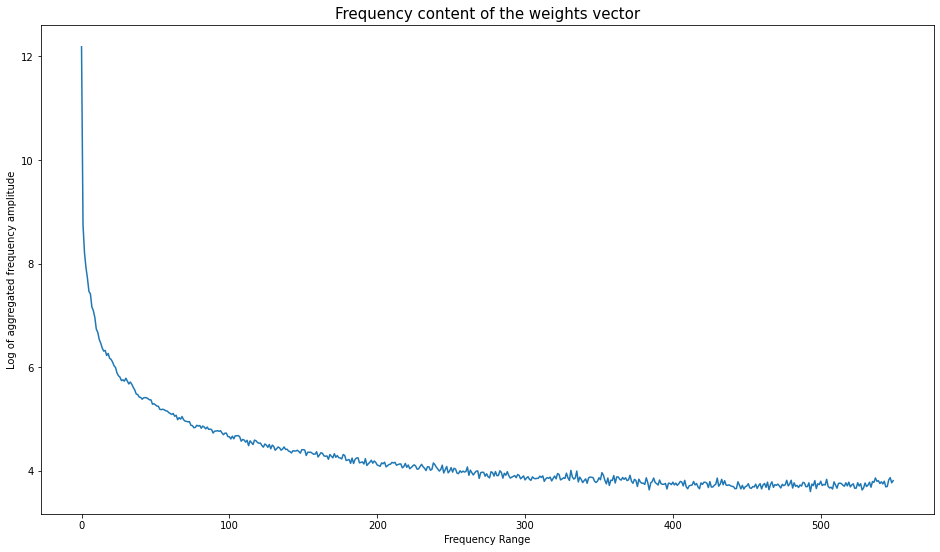

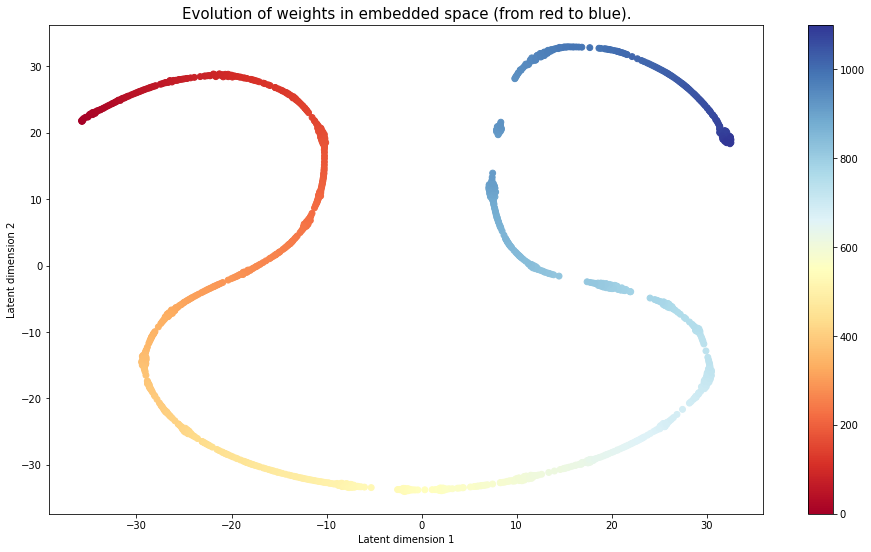

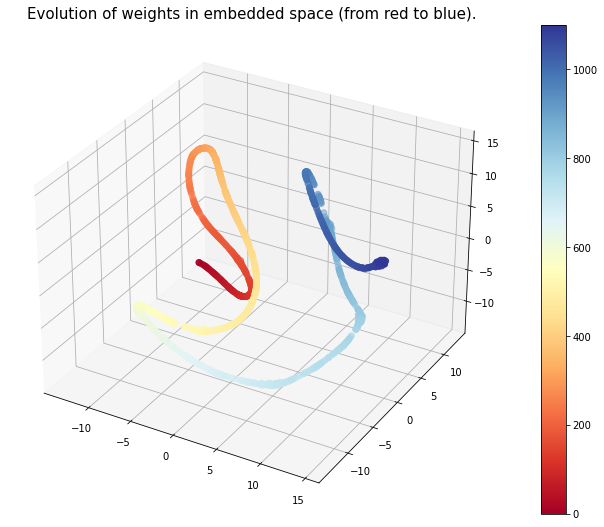

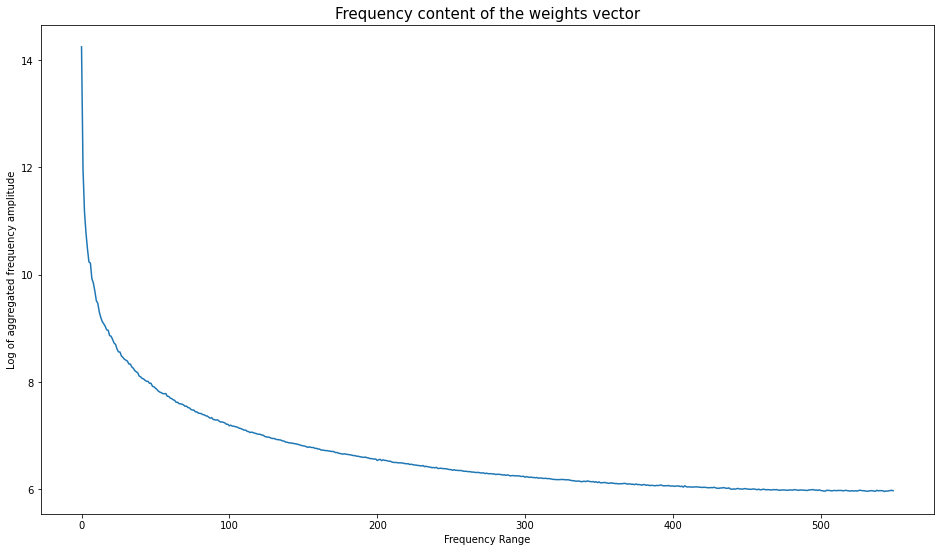

In [16]:
CIFAR100_sgd_report = weights_report("../../project/bests/CIFAR100_SGD/",output_folder="../figures/CIFAR100_SGD",show=True,save=True)

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


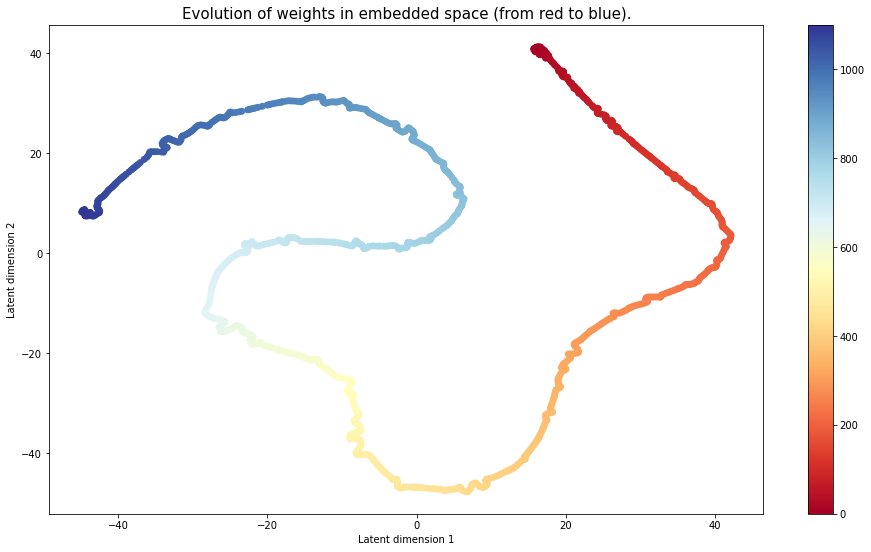

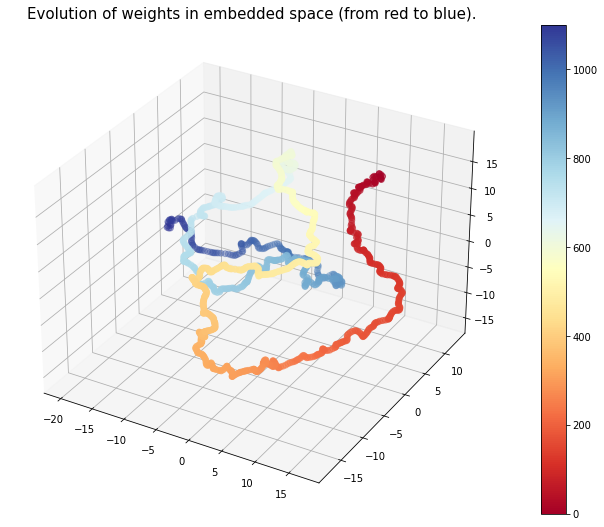

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


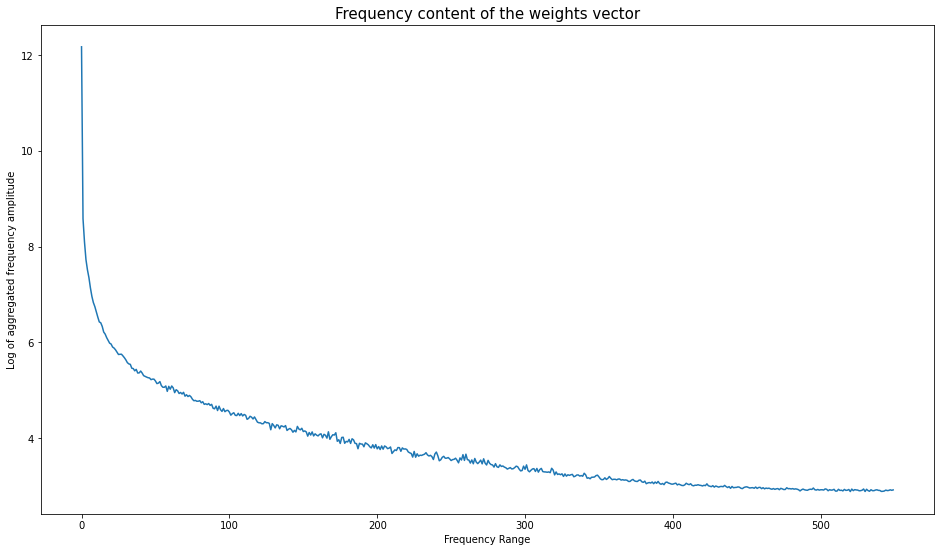

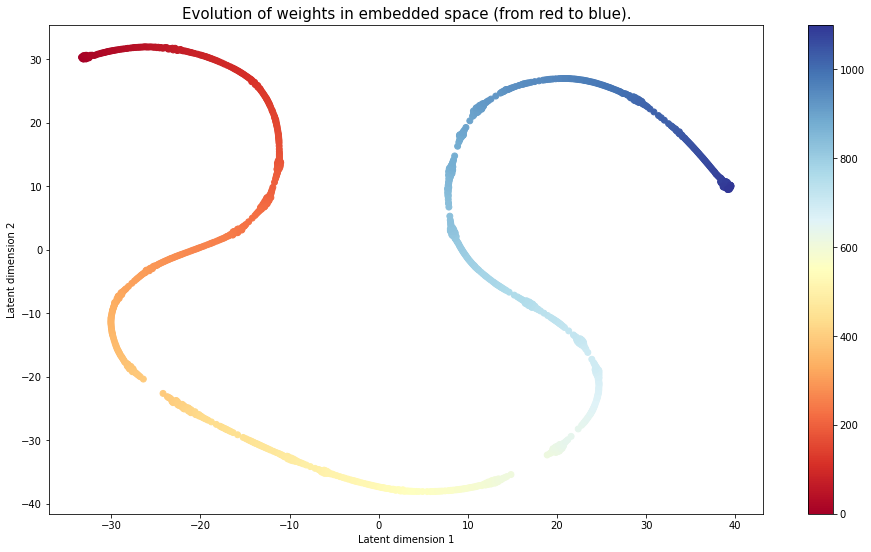

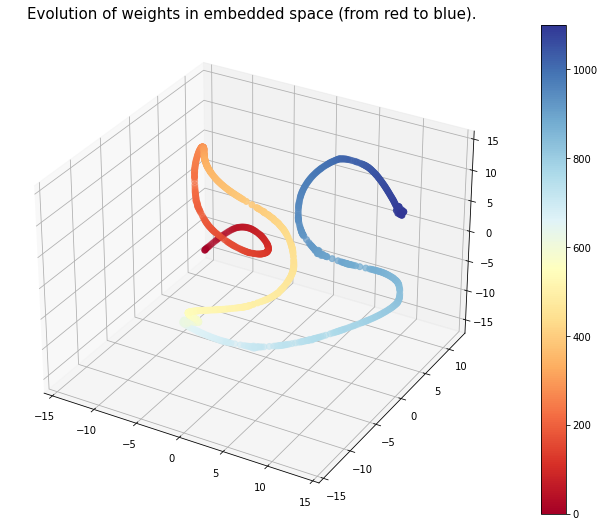

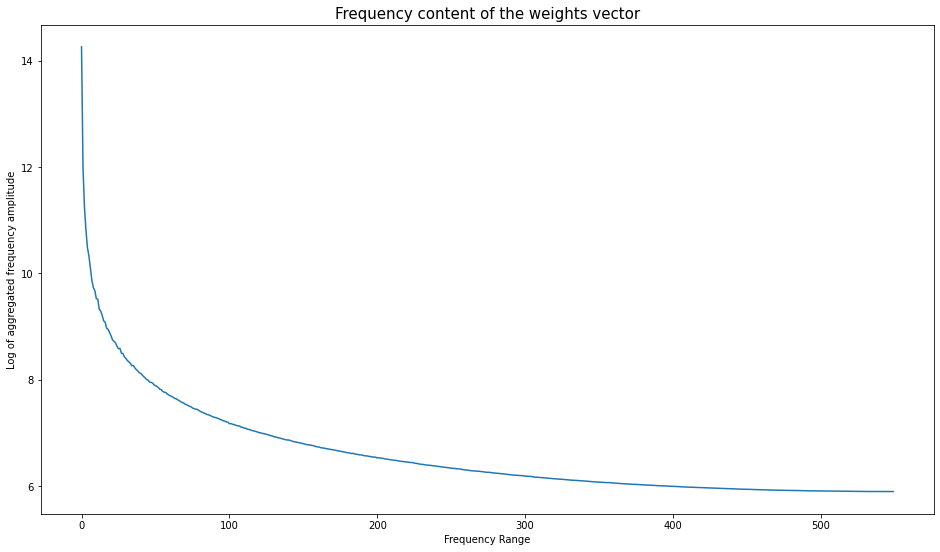

In [17]:
CIFAR100_msgd_report = weights_report("../../project/bests/CIFAR100_MSGD/",output_folder="../figures/CIFAR100_MSGD",show=True,save=True)

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


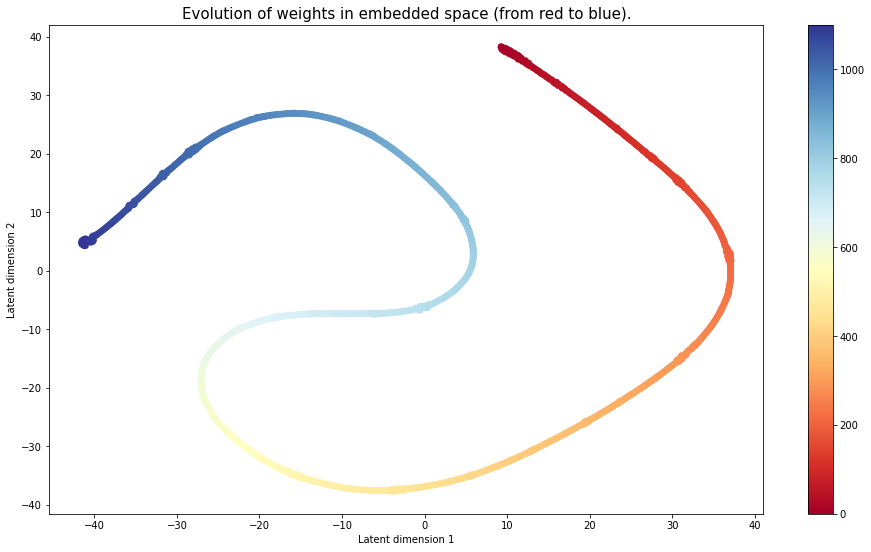

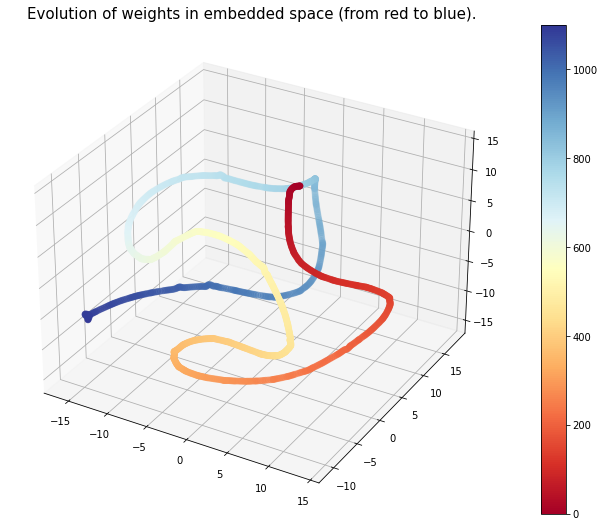

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


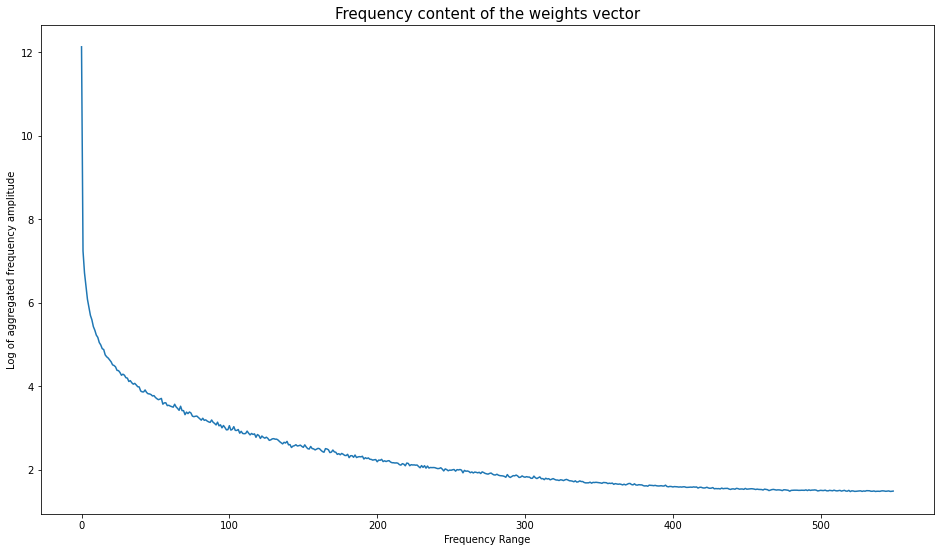

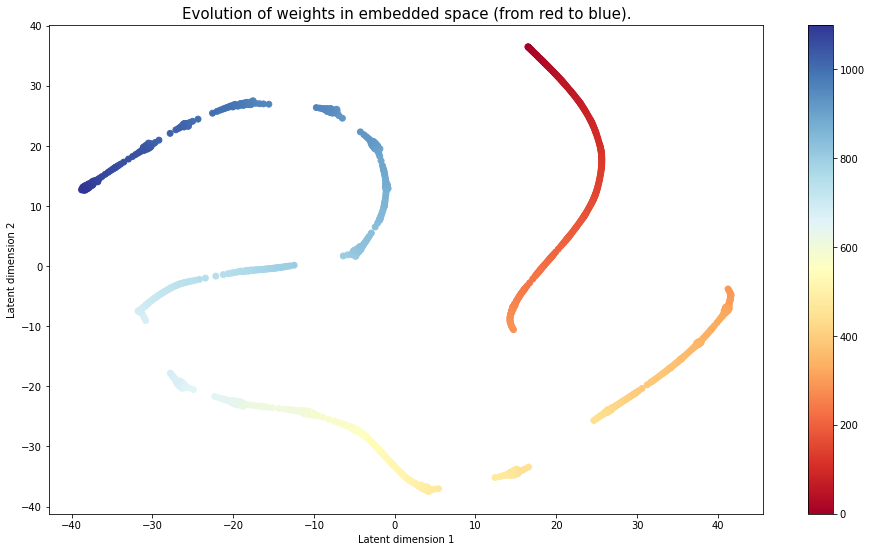

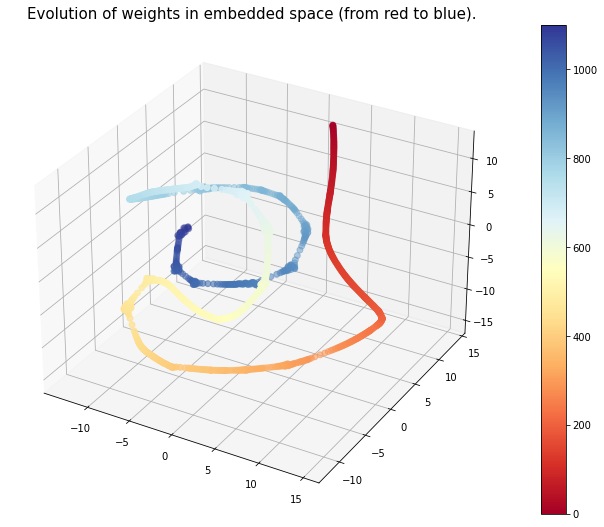

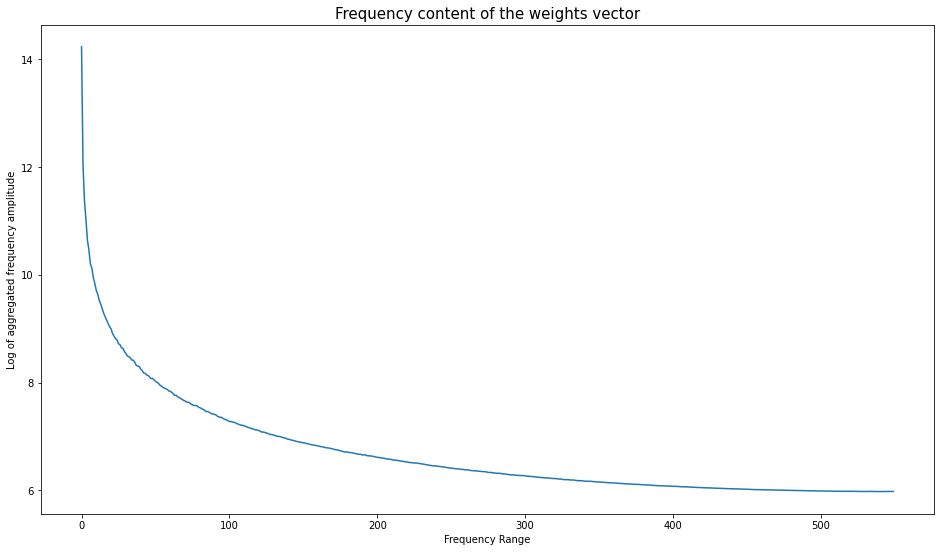

In [18]:
CIFAR100_adam_report = weights_report("../../project/bests/CIFAR100_ADAM/",output_folder="../figures/CIFAR100_ADAM",show=True,save=True)

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


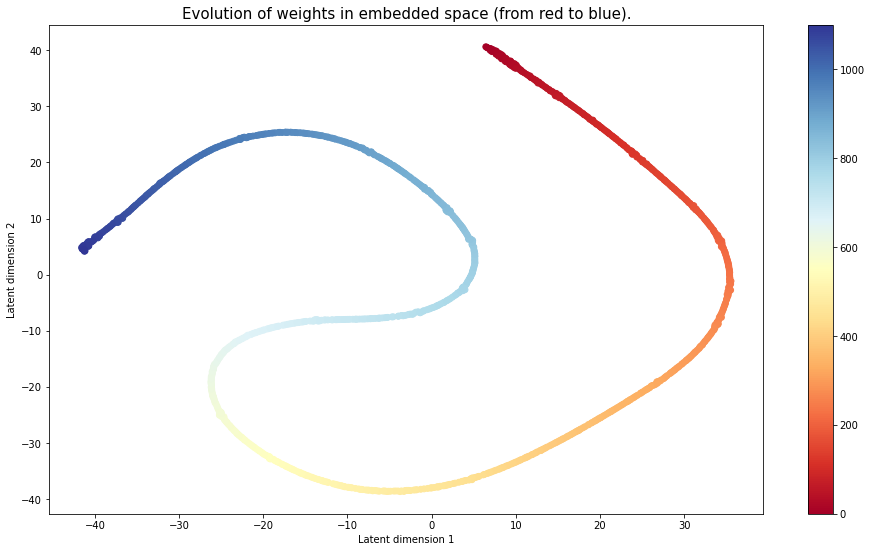

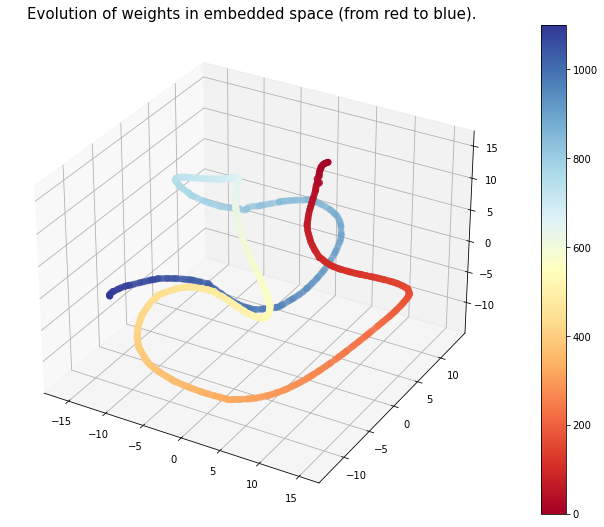

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


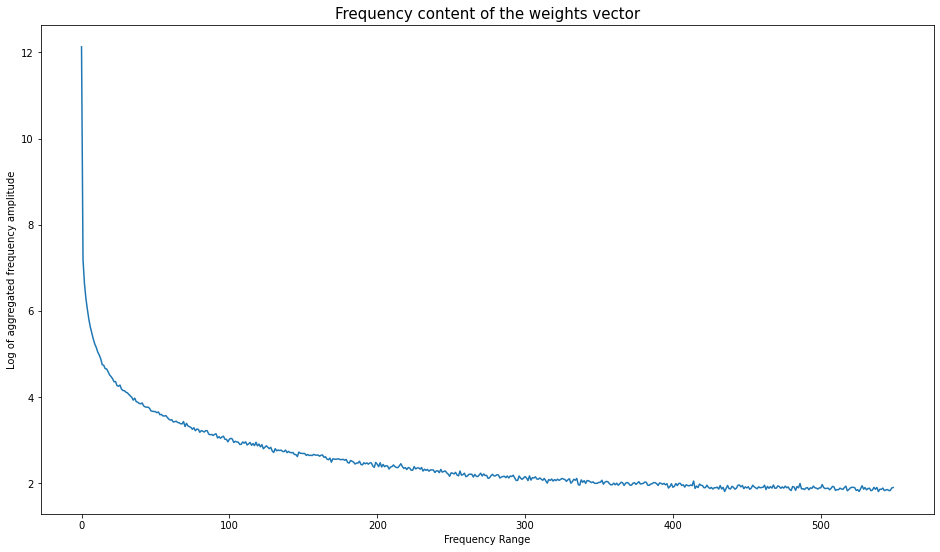

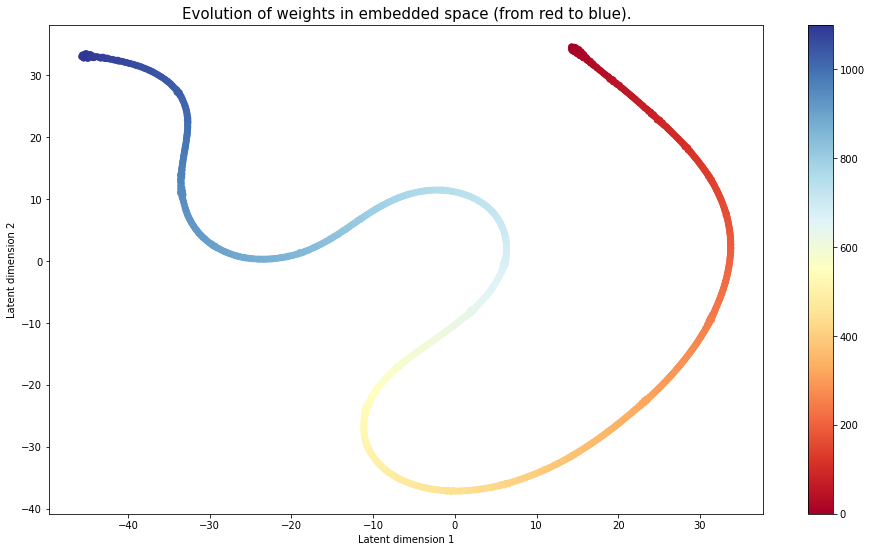

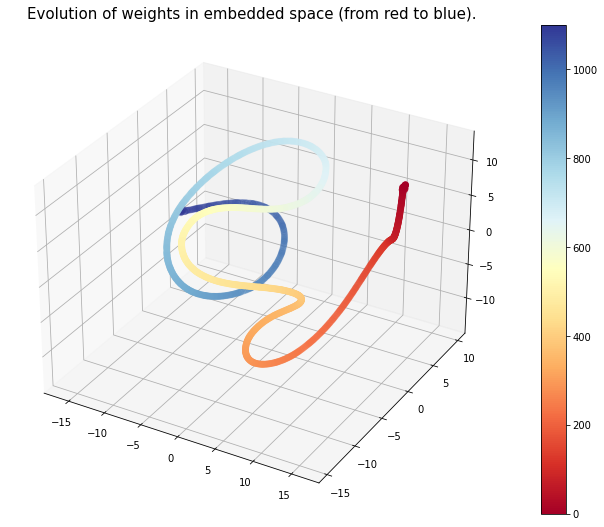

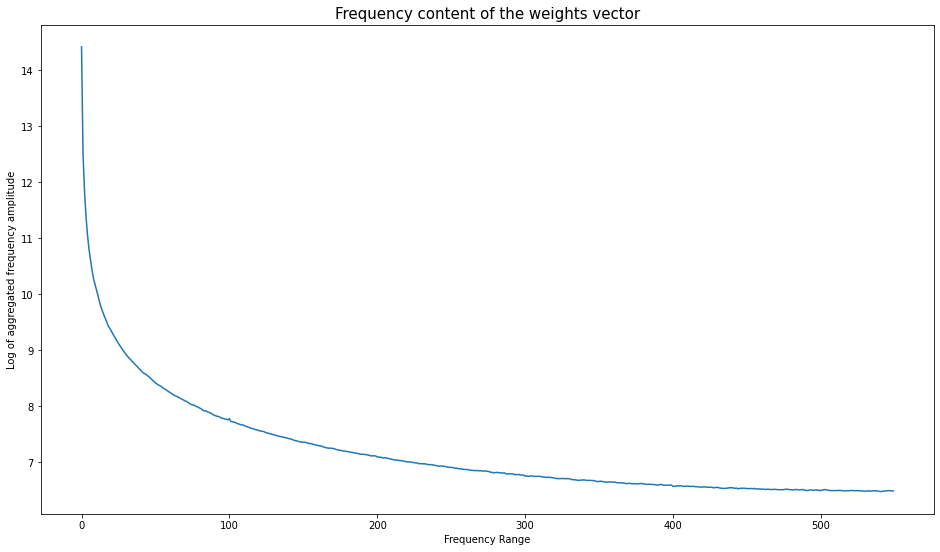

In [19]:
CIFAR100_rms_report = weights_report("../../project/bests/CIFAR100_RMS/",output_folder="../figures/CIFAR100_RMS",show=True,save=True)

In [20]:
CIFAR100_sgd_report

{'first_cnn': [0.41010734,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>],
 'linear': [0.5643596,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>]}

In [21]:
CIFAR100_msgd_report

{'first_cnn': [0.35612184,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>],
 'linear': [0.56142527,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>]}

In [22]:
CIFAR100_adam_report

{'first_cnn': [0.11956337,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>],
 'linear': [0.5966226,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>]}

In [23]:
CIFAR100_rms_report

{'first_cnn': [0.12079107,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>],
 'linear': [0.6536123,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>]}

### CIFAR 10

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


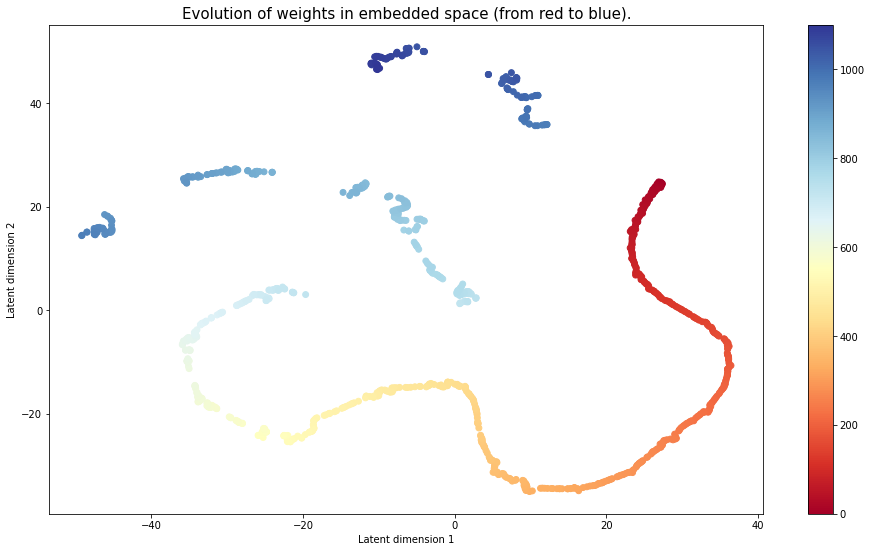

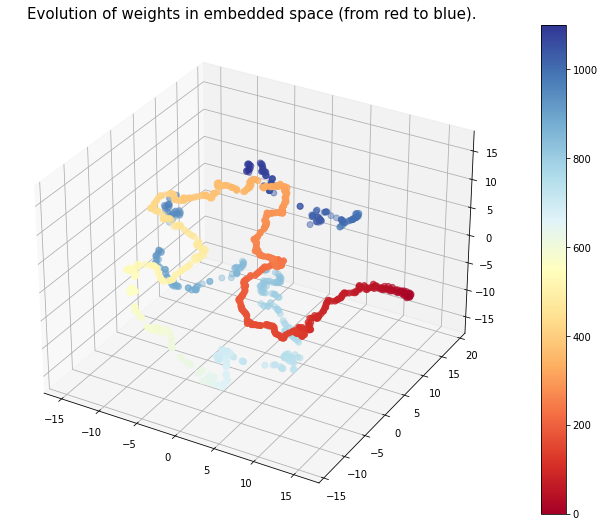

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


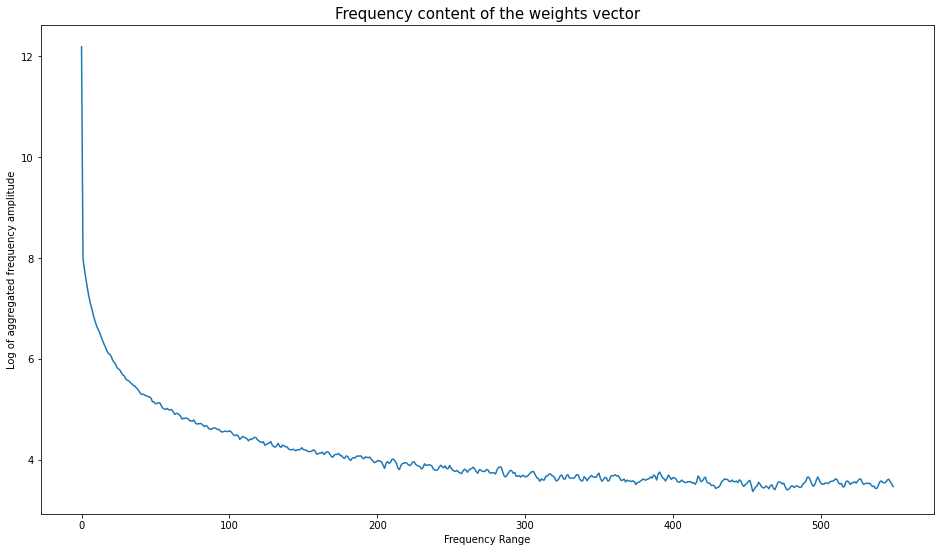

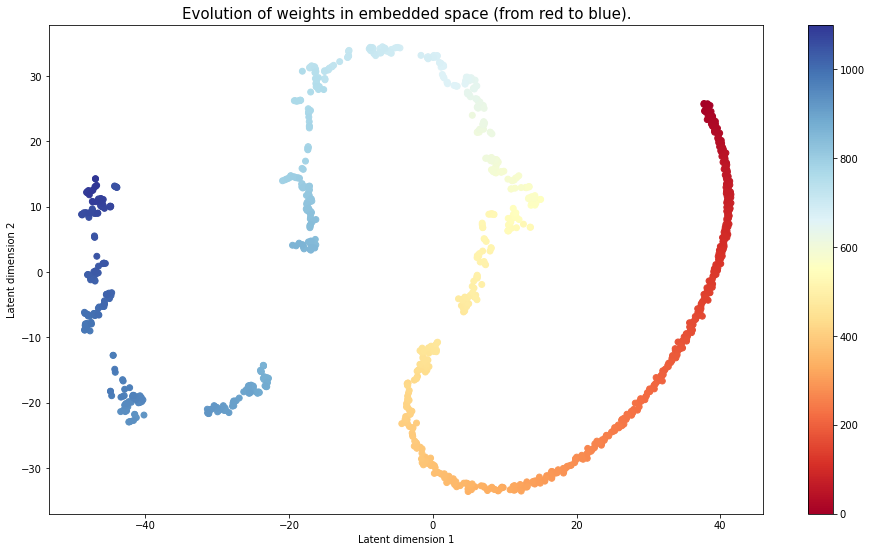

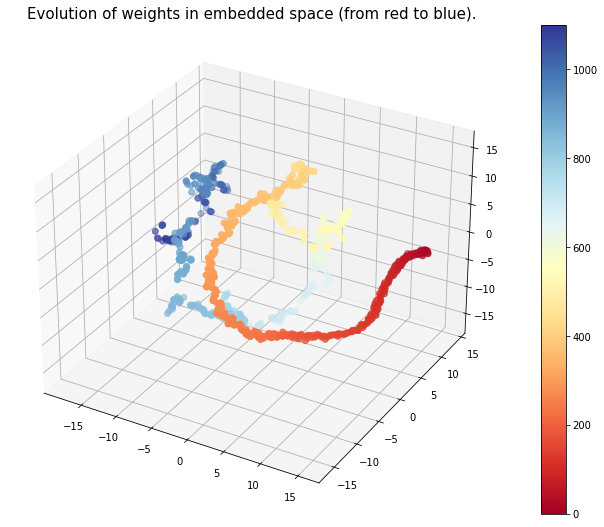

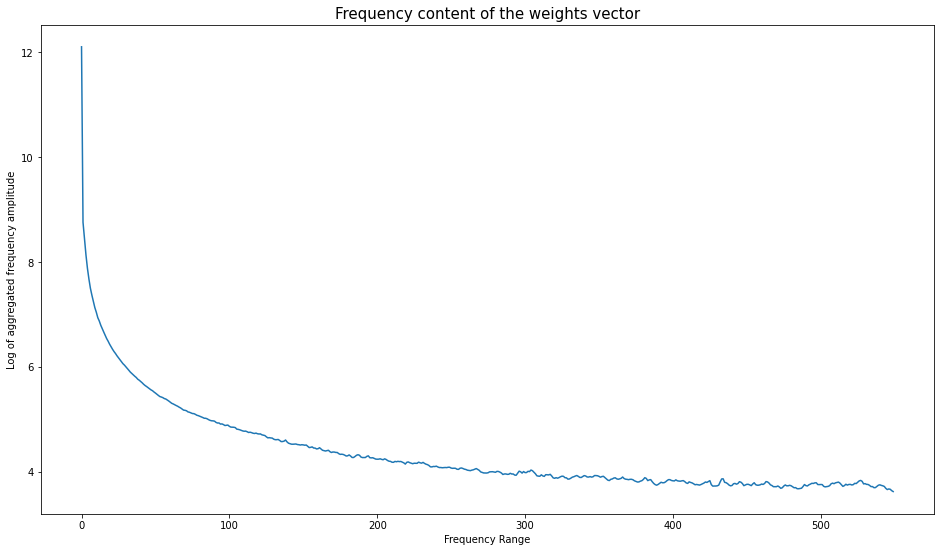

In [24]:
CIFAR10_sgd_report = weights_report("../../project/bests/CIFAR10_SGD/",output_folder="../figures/CIFAR10_SGD",show=True,save=True)

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


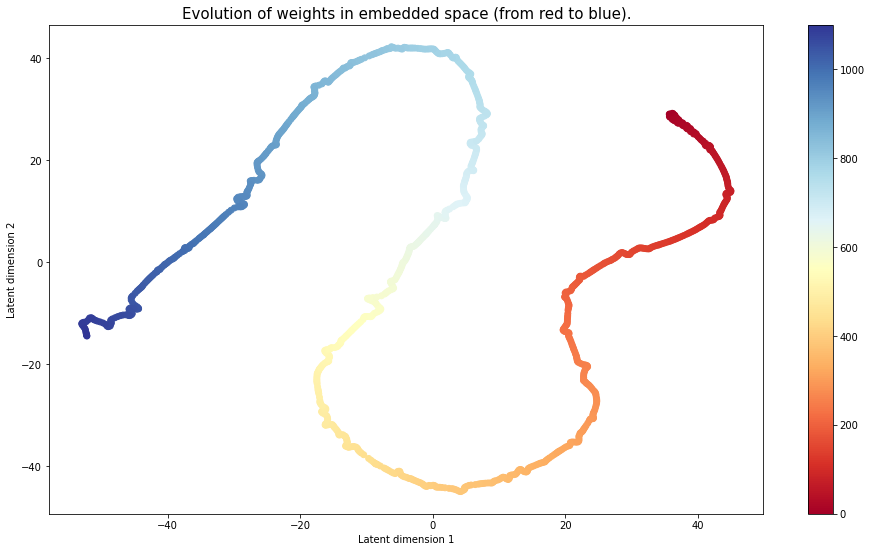

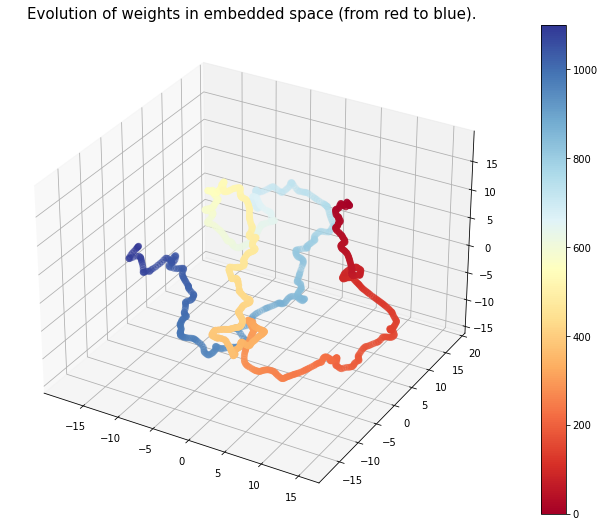

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


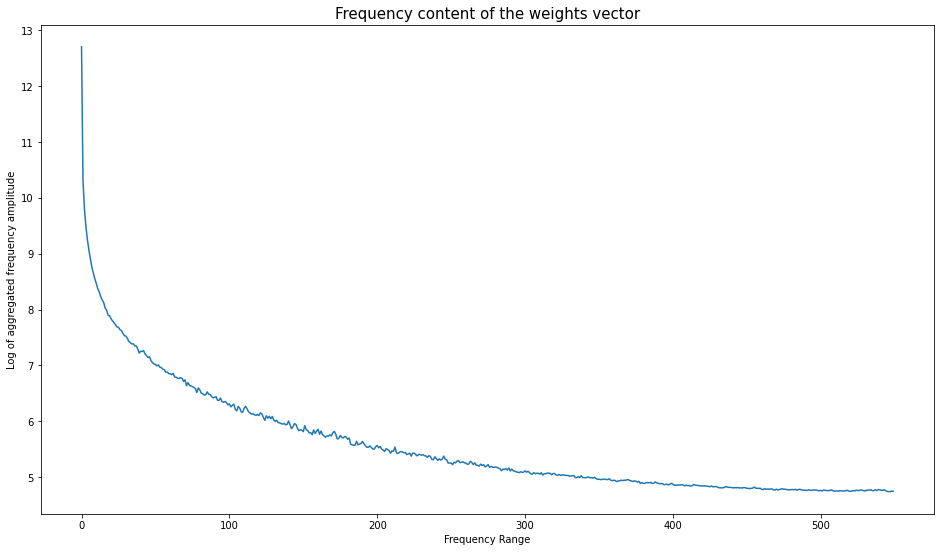

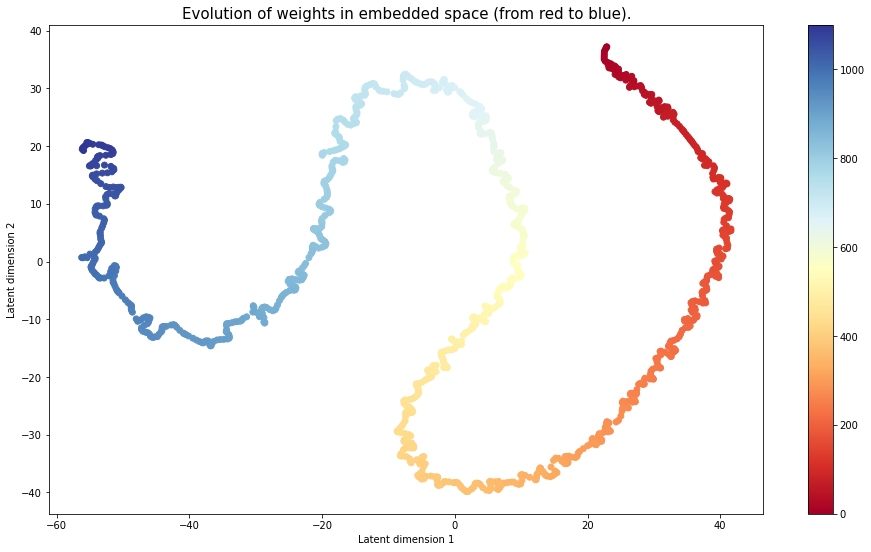

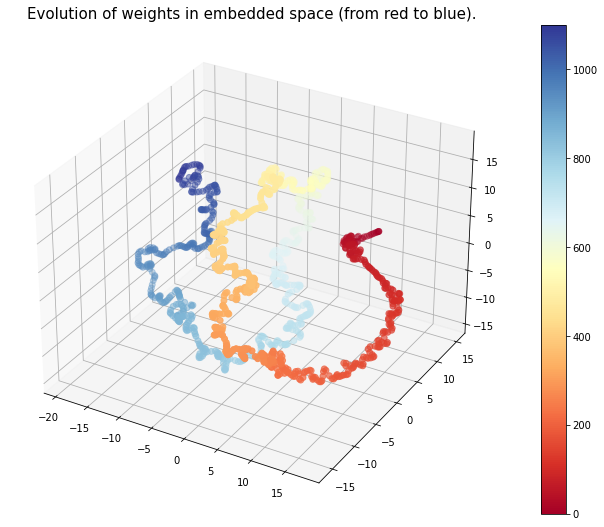

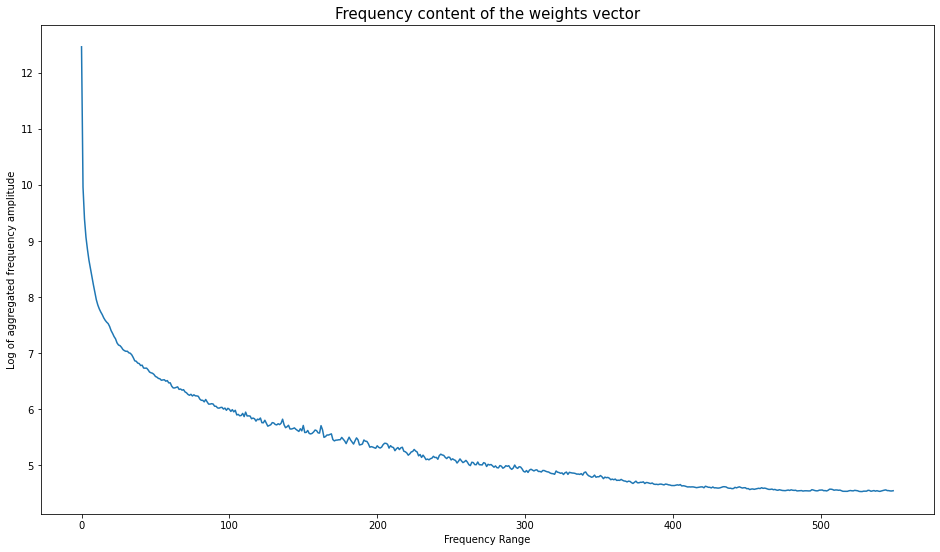

In [25]:
CIFAR10_msgd_report = weights_report("../../project/bests/CIFAR10_MSGD/",output_folder="../figures/CIFAR10_MSGD",show=True,save=True)

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


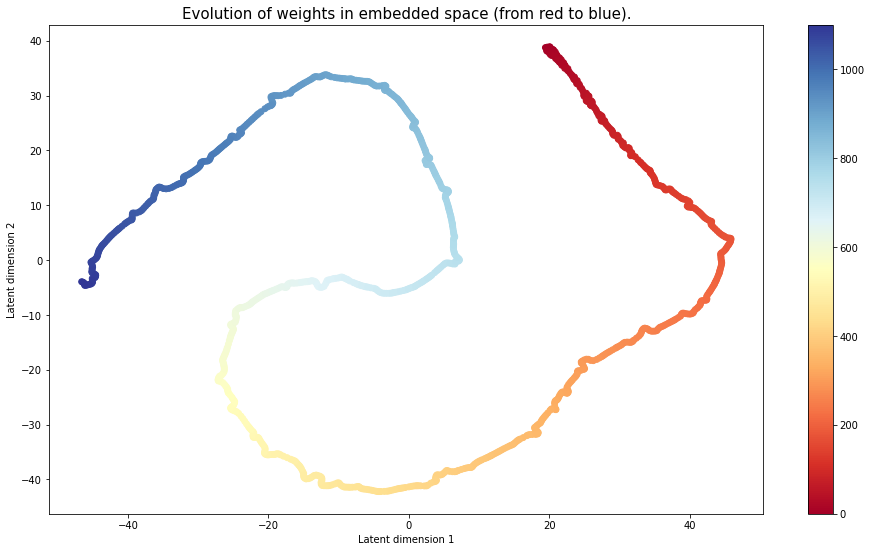

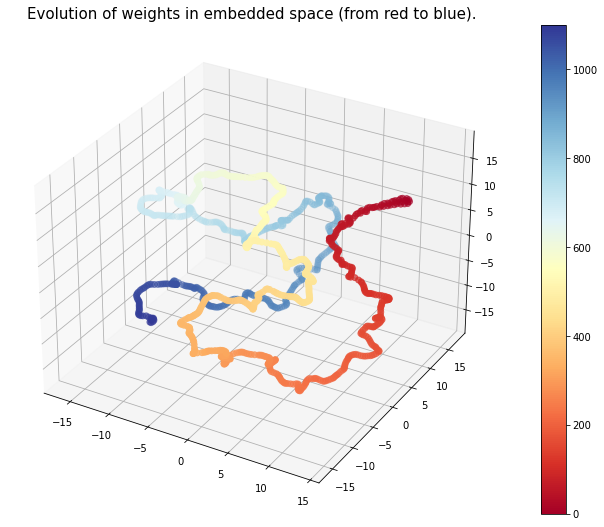

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


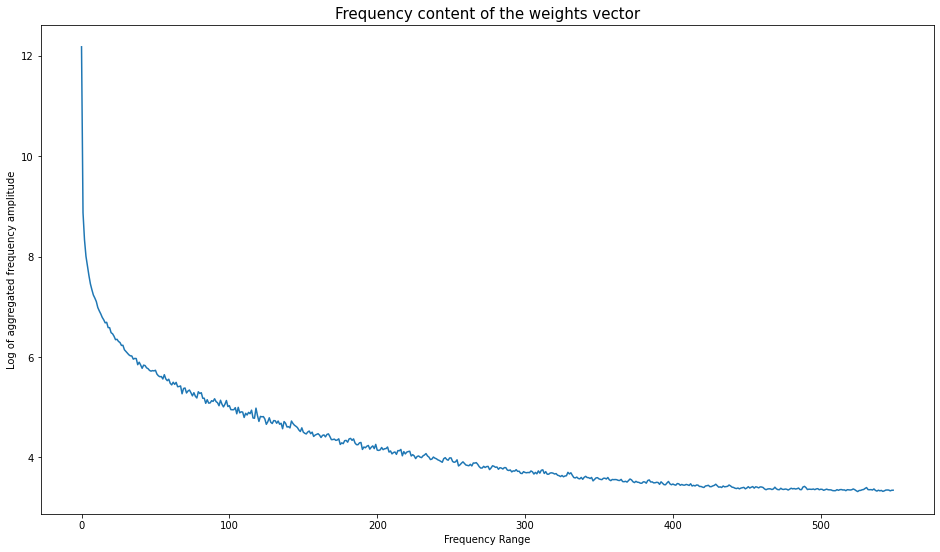

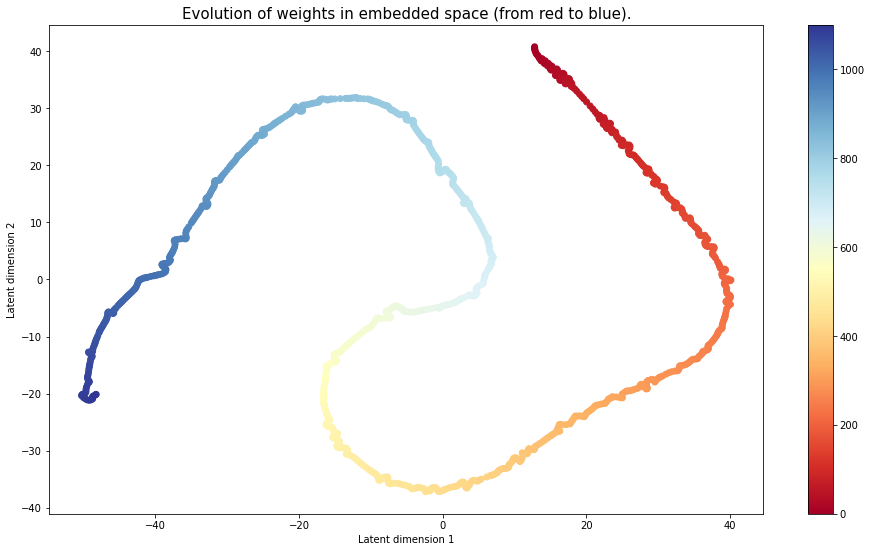

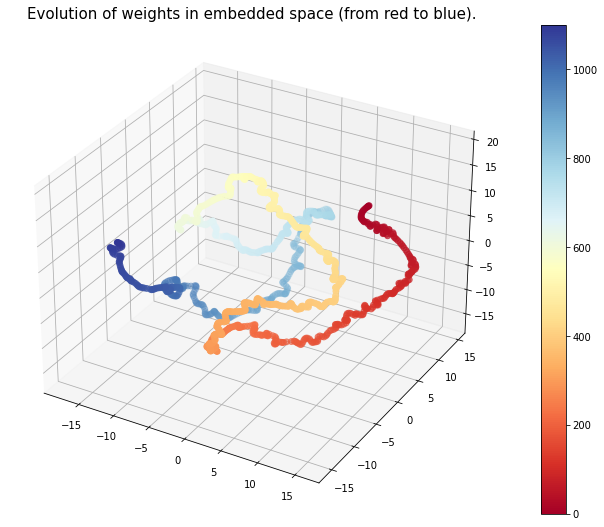

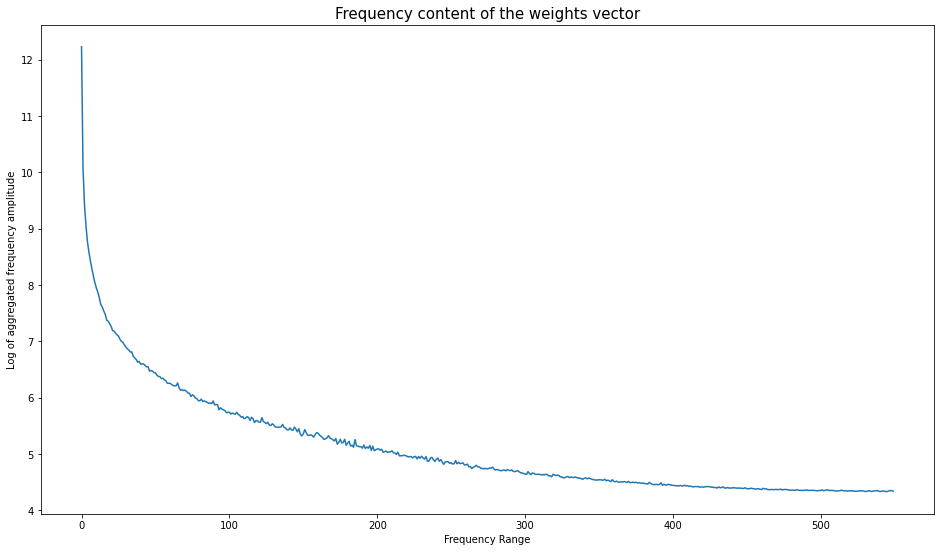

In [26]:
CIFAR10_adam_report = weights_report("../../project/bests/CIFAR10_ADAM/",output_folder="../figures/CIFAR10_ADAM",show=True,save=True)

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


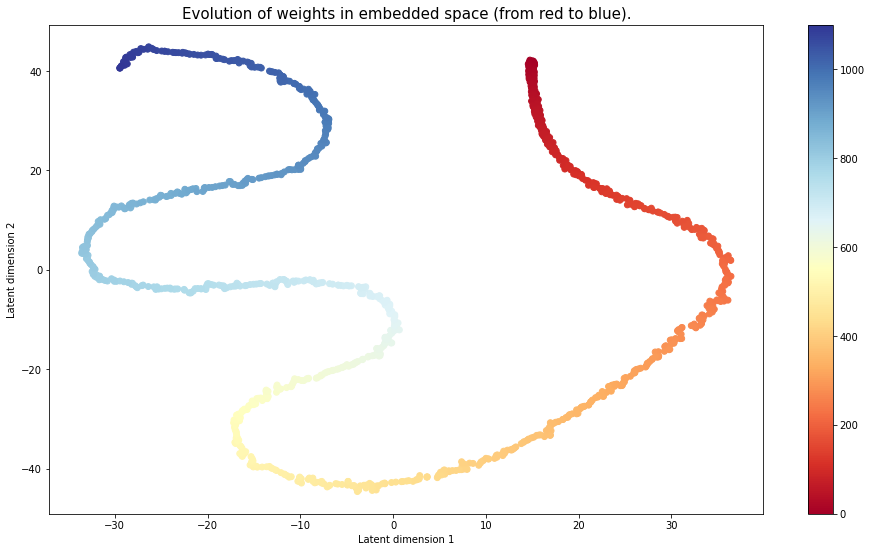

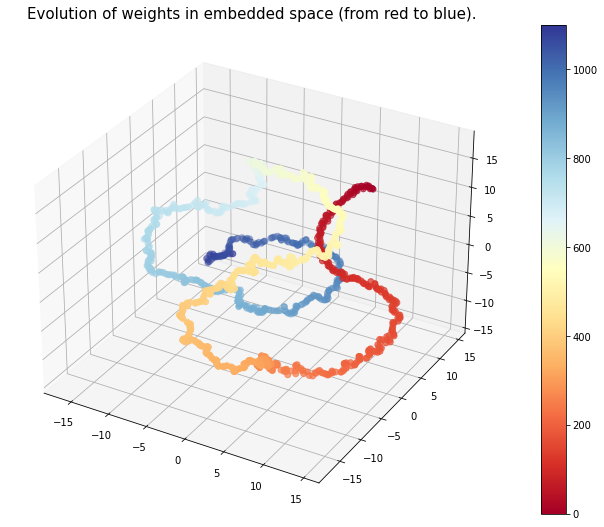

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


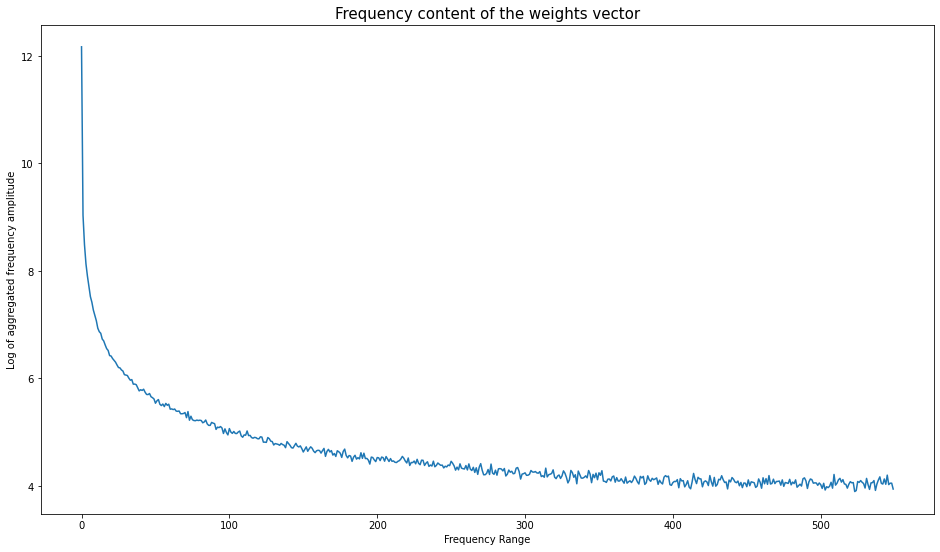

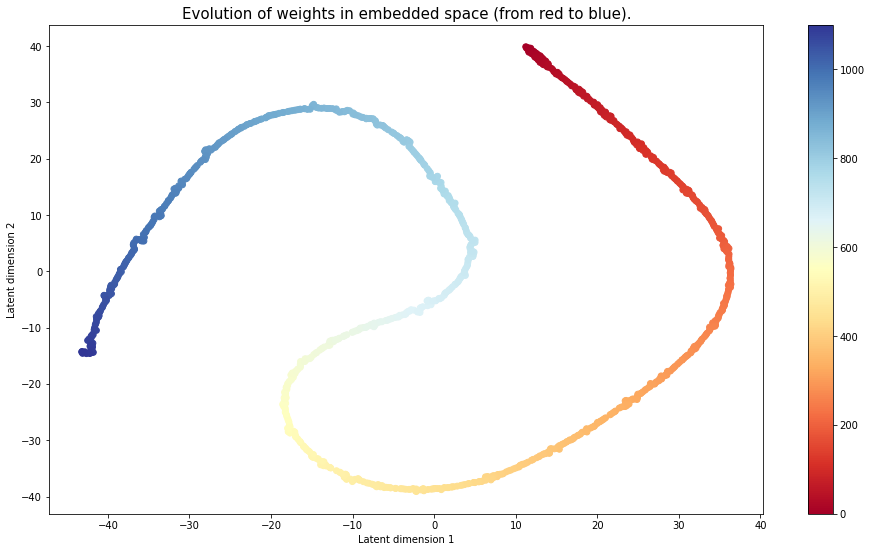

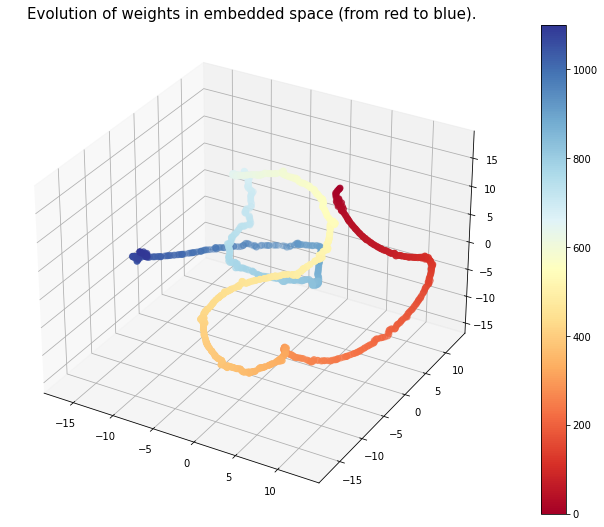

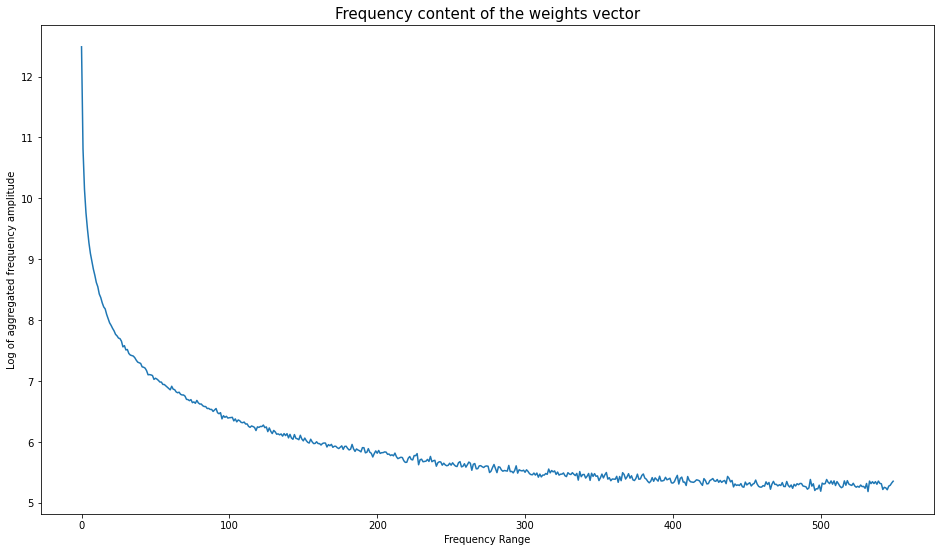

In [27]:
CIFAR10_rms_report = weights_report("../../project/bests/CIFAR10_RMS/",output_folder="../figures/CIFAR10_RMS",show=True,save=True)

In [28]:
CIFAR10_sgd_report

{'first_cnn': [0.35639068,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>],
 'linear': [0.47097927,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>]}

In [29]:
CIFAR10_msgd_report

{'first_cnn': [0.66074854,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>],
 'linear': [0.63258183,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>]}

In [30]:
CIFAR10_adam_report

{'first_cnn': [0.45108905,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>],
 'linear': [0.6598538,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>]}

In [31]:
CIFAR10_rms_report

{'first_cnn': [0.49029917,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>],
 'linear': [0.7533914,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 2 Axes>,
  <Figure size 1152x648 with 1 Axes>]}

### FashionMNIST

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


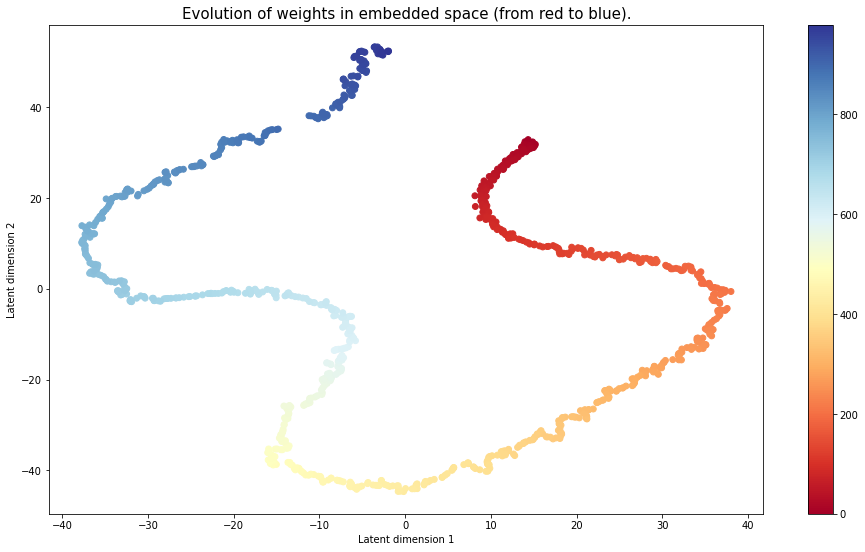

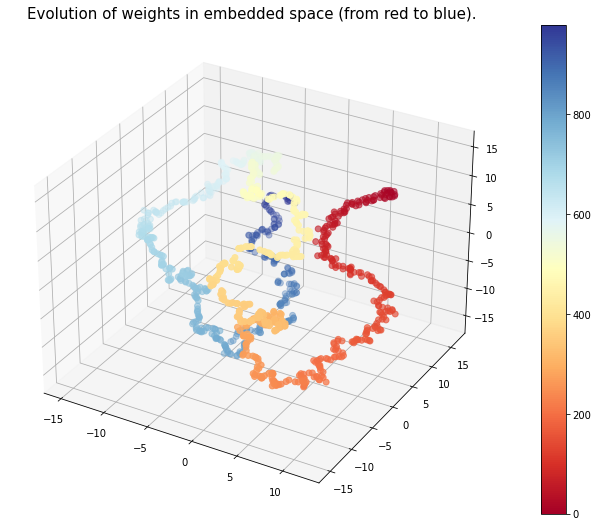

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


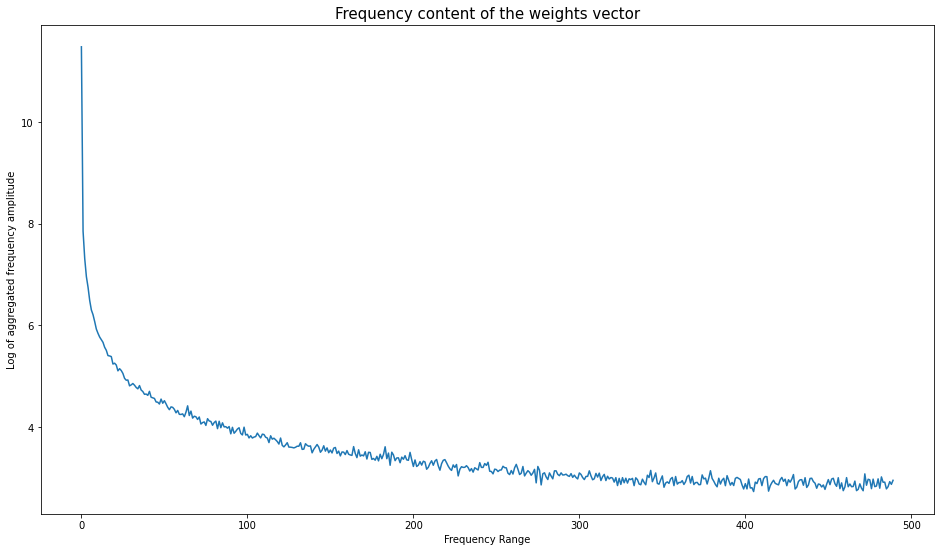

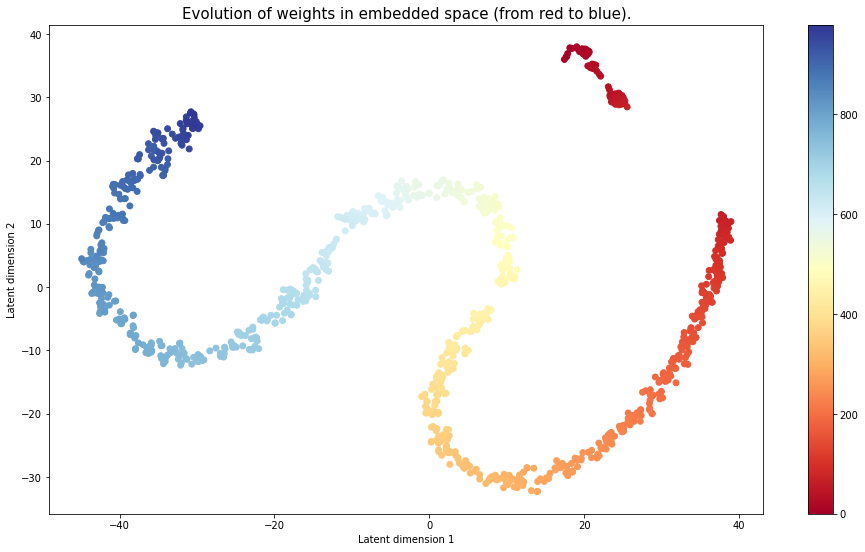

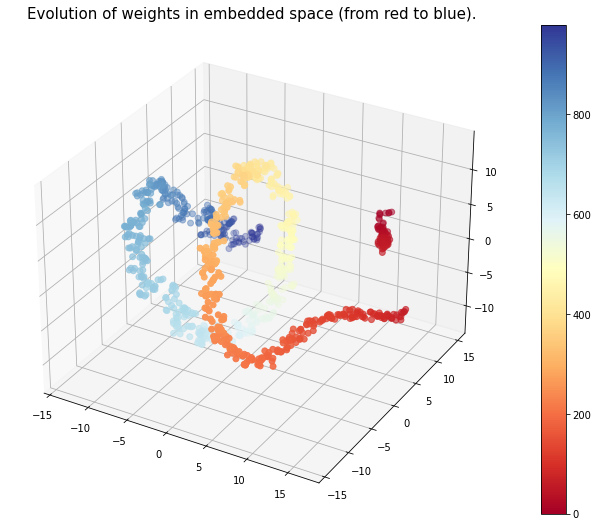

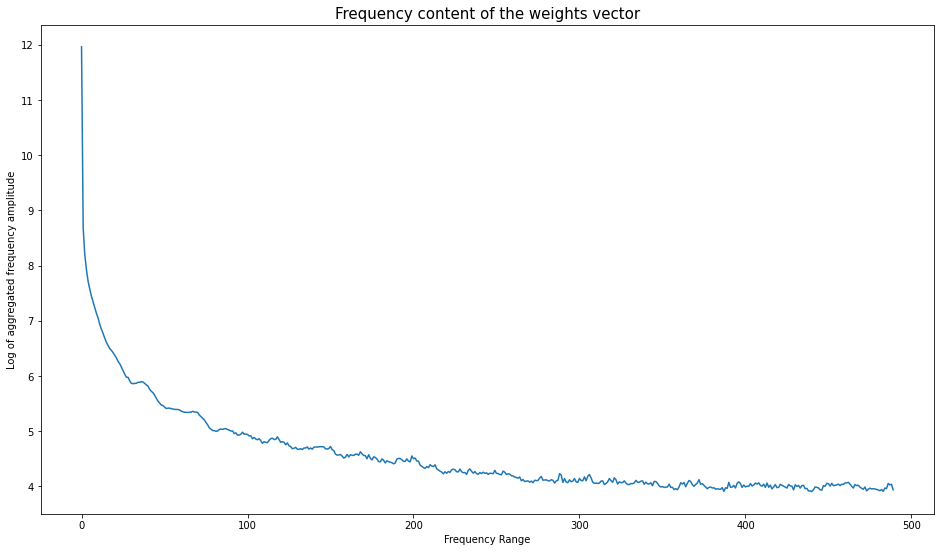

In [32]:
FashionMNIST_sgd_report = weights_report("../../project/bests/FashionMNIST_SGD/",output_folder="../figures/FashionMNIST_SGD",show=True,save=True)

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


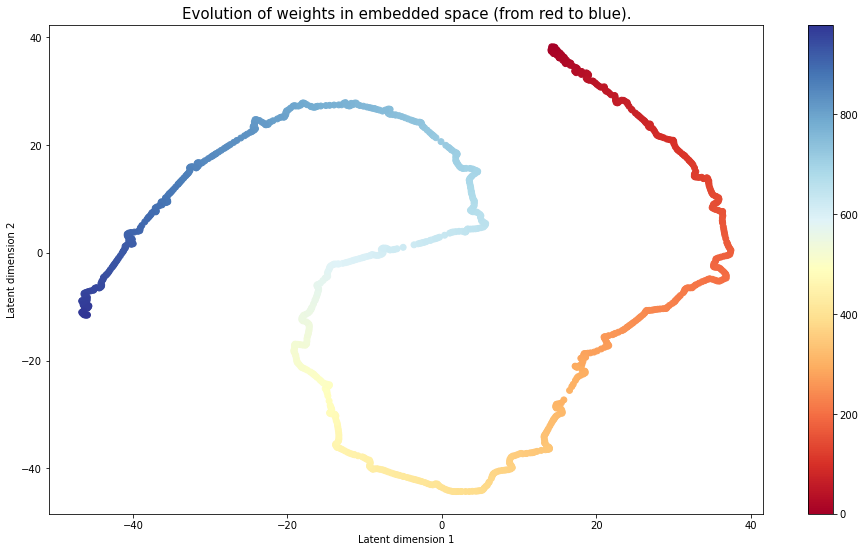

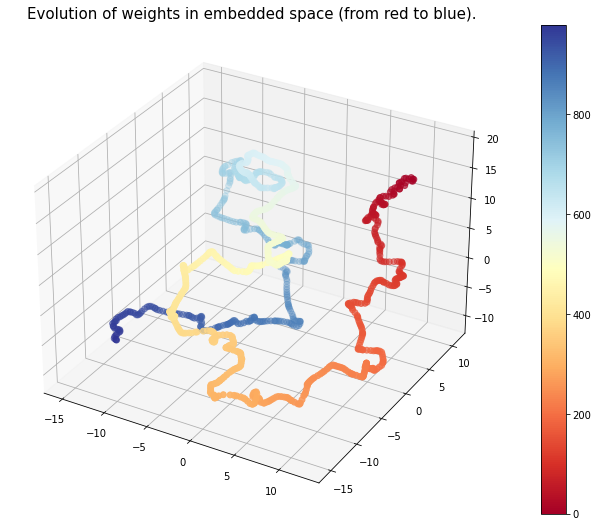

C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\jerem\anaconda3\envs\opt_ml\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


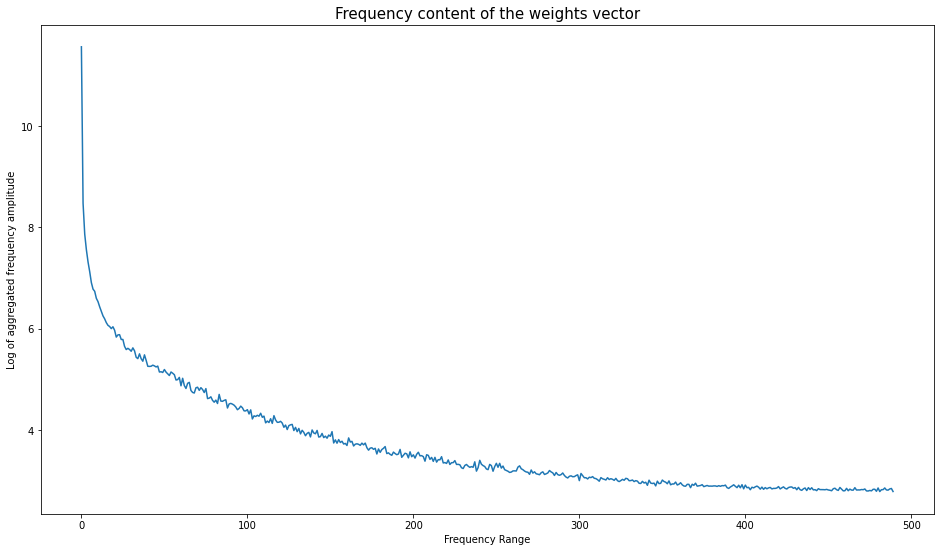

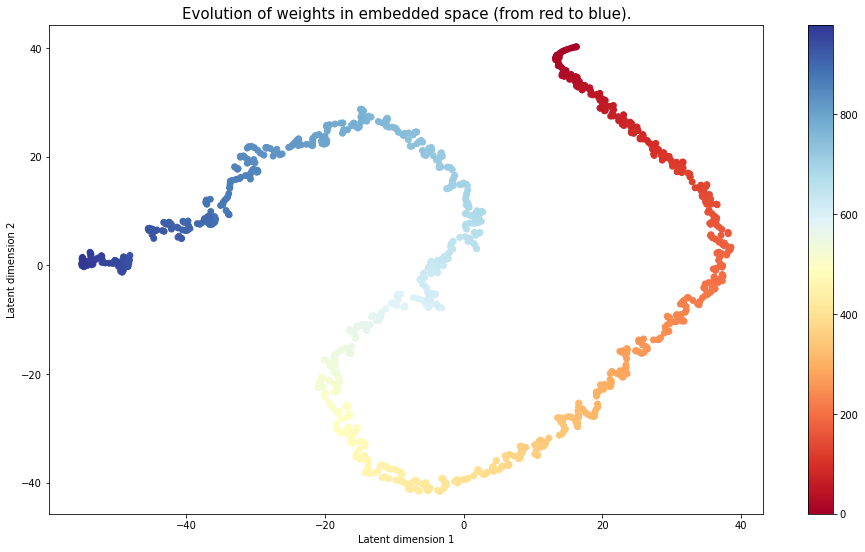

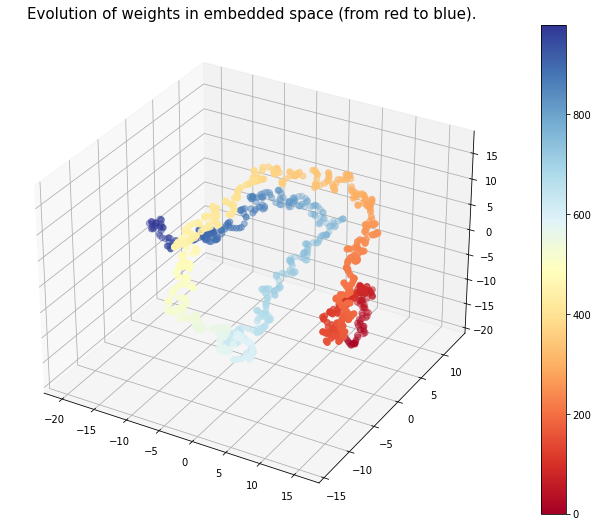

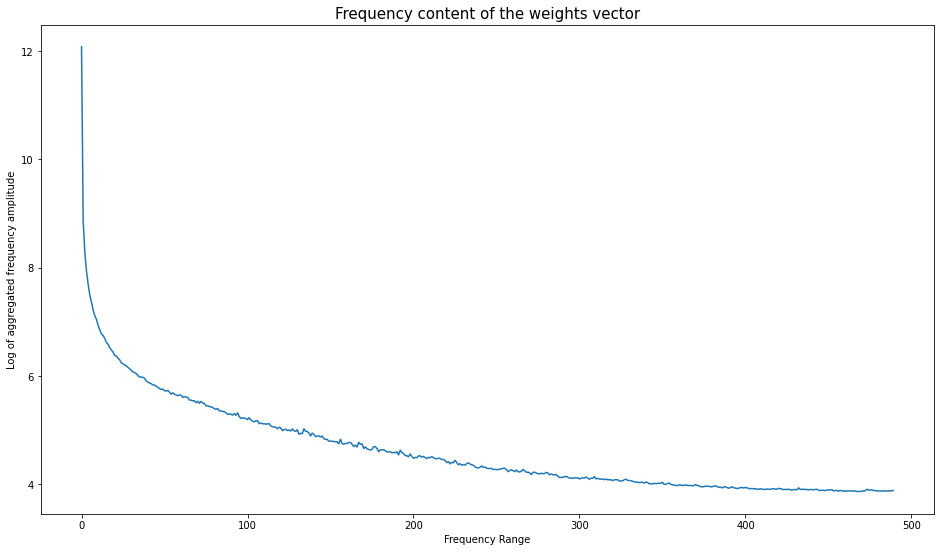

In [33]:
FashionMNIST_msgd_report = weights_report("../../project/bests/FashionMNIST_MSGD/",output_folder="../figures/FashionMNIST_MSGD",show=True,save=True)

In [34]:
FashionMNIST_adam_report = weights_report("../../project/bests/FashionMNIST_ADAM/",output_folder="../figures/FashionMNIST_ADAM",show=True,save=True)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
FashionMNIST_rms_report = weights_report("../../project/bests/FashionMNIST_RMS/",output_folder="../figures/FashionMNIST_RMS",show=True,save=True)

In [ ]:
FashionMNIST_sgd_report

In [ ]:
FashionMNIST_msgd_report

In [ ]:
FashionMNIST_adam_report

In [ ]:
FashionMNIST_rms_report

### MNIST